<a href="https://colab.research.google.com/github/SriVinayA/SJSU-CMPE255-DataMining/blob/main/DM_Assignment_5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile

# Define the path to the uploaded file and the extraction directory
zip_path = '/content/drive/MyDrive/SJSU/Sem1/CMPE255 - Data Mining/Assignment 5/archive_2.zip'
extraction_dir = '/content/drive/MyDrive/SJSU/Sem1/CMPE255 - Data Mining/Assignment 5/images_dataset/'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# List the contents of the extracted directory
extracted_contents = os.listdir(extraction_dir)
extracted_contents

['Pistachio_Image_Dataset']

In [2]:
# Dive deeper into the "Pistachio_Image_Dataset" directory
dataset_dir = os.path.join(extraction_dir, 'Pistachio_Image_Dataset')
subdirectories = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]

# Determine the number of images in each subdirectory
image_counts = {}
for sub_dir in subdirectories:
    image_counts[sub_dir] = len(os.listdir(os.path.join(dataset_dir, sub_dir)))

image_counts

{'Pistachio_16_Features_Dataset': 4,
 'Pistachio_28_Features_Dataset': 4,
 'Pistachio_Image_Dataset': 3}

In [3]:
# Inspecting the contents of the "Pistachio_16_Features_Dataset" subdirectory
pistachio_16_dir = os.path.join(dataset_dir, 'Pistachio_16_Features_Dataset')
pistachio_16_contents = os.listdir(pistachio_16_dir)

pistachio_16_contents

['Pistachio_16_Features_Dataset.arff',
 'Pistachio_16_Features_Dataset.xls',
 'Pistachio_16_Features_Dataset.xlsx',
 'Pistachio_16_Features_Dataset_Citation_Request.txt']

In [4]:
# Inspecting the contents of the "Pistachio_28_Features_Dataset" and "Pistachio_Image_Dataset" subdirectories
pistachio_28_dir = os.path.join(dataset_dir, 'Pistachio_28_Features_Dataset')
pistachio_image_dir = os.path.join(dataset_dir, 'Pistachio_Image_Dataset')

pistachio_28_contents = os.listdir(pistachio_28_dir)
pistachio_image_contents = os.listdir(pistachio_image_dir)

pistachio_28_contents, pistachio_image_contents

(['Pistachio_28_Features_Dataset.arff',
  'Pistachio_28_Features_Dataset.xls',
  'Pistachio_28_Features_Dataset.xlsx',
  'Pistachio_28_Features_Dataset_Citation_Request.txt'],
 ['Kirmizi_Pistachio',
  'Pistachio_Image_Dataset_Request.txt',
  'Siirt_Pistachio'])

In [5]:
# Checking the number of images in the "Kirmizi_Pistachio" and "Siirt_Pistachio" directories
kirmizi_dir = os.path.join(pistachio_image_dir, 'Kirmizi_Pistachio')
siirt_dir = os.path.join(pistachio_image_dir, 'Siirt_Pistachio')

kirmizi_image_count = len([f for f in os.listdir(kirmizi_dir) if f.lower().endswith(('png', 'jpg', 'jpeg'))])
siirt_image_count = len([f for f in os.listdir(siirt_dir) if f.lower().endswith(('png', 'jpg', 'jpeg'))])

kirmizi_image_count, siirt_image_count

(1232, 916)

The dataset contains:

- 1,232 images in the Kirmizi_Pistachio category.
- 916 images in the Siirt_Pistachio category.

Now, let's visually inspect a few sample images from each category to get a sense of the dataset's nature. We'll display a few images from both the Kirmizi_Pistachio and Siirt_Pistachio categories.

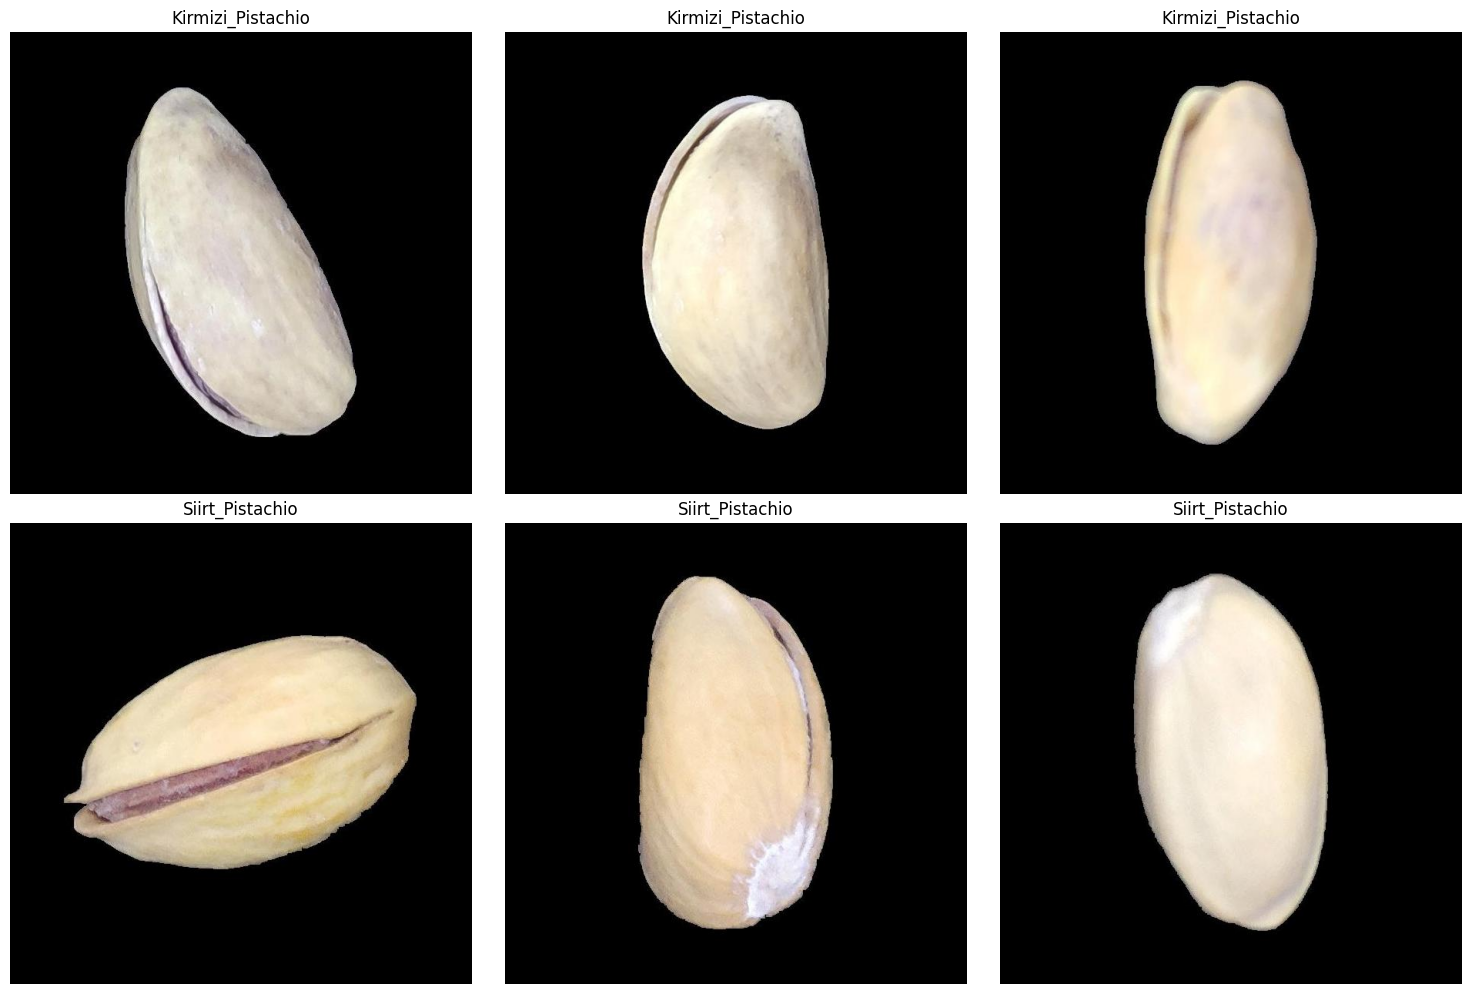

In [6]:
import matplotlib.pyplot as plt
import random
from PIL import Image

# Randomly select a few images from each category
num_samples = 3
kirmizi_samples = random.sample(os.listdir(kirmizi_dir), num_samples)
siirt_samples = random.sample(os.listdir(siirt_dir), num_samples)

# Display the selected images
fig, axes = plt.subplots(2, num_samples, figsize=(15, 10))

for i, img_name in enumerate(kirmizi_samples):
    img_path = os.path.join(kirmizi_dir, img_name)
    img = Image.open(img_path)
    axes[0, i].imshow(img)
    axes[0, i].axis('off')
    axes[0, i].set_title('Kirmizi_Pistachio')

for i, img_name in enumerate(siirt_samples):
    img_path = os.path.join(siirt_dir, img_name)
    img = Image.open(img_path)
    axes[1, i].imshow(img)
    axes[1, i].axis('off')
    axes[1, i].set_title('Siirt_Pistachio')

plt.tight_layout()
plt.show()

From a visual inspection:

- The Kirmizi_Pistachio category seems to contain images of reddish-colored pistachios.
- The Siirt_Pistachio category contains images of pistachios with a more natural, greenish hue.

Given that we're dealing with an image dataset with two categories, here are the steps we'll undertake:

1. **Distribution Analysis:** Understand the distribution of images between the two categories.
2. **Image Size Analysis:** Analyze the sizes of the images to see if there's any variance or if they're all uniform.
3. **Color Distribution Analysis:** Analyze the color distribution of images in both categories to understand any potential differences in color patterns.
4. **Texture Analysis (optional):** Depending on the dataset, we might be able to identify patterns or textures that distinguish the two categories.
5. **Potential Data Augmentation Visualization:** Showcase how data augmentation techniques might apply to these images, which is useful for machine learning purposes.

Let's start with the first step: Distribution Analysis. We'll visualize the number of images in each category.

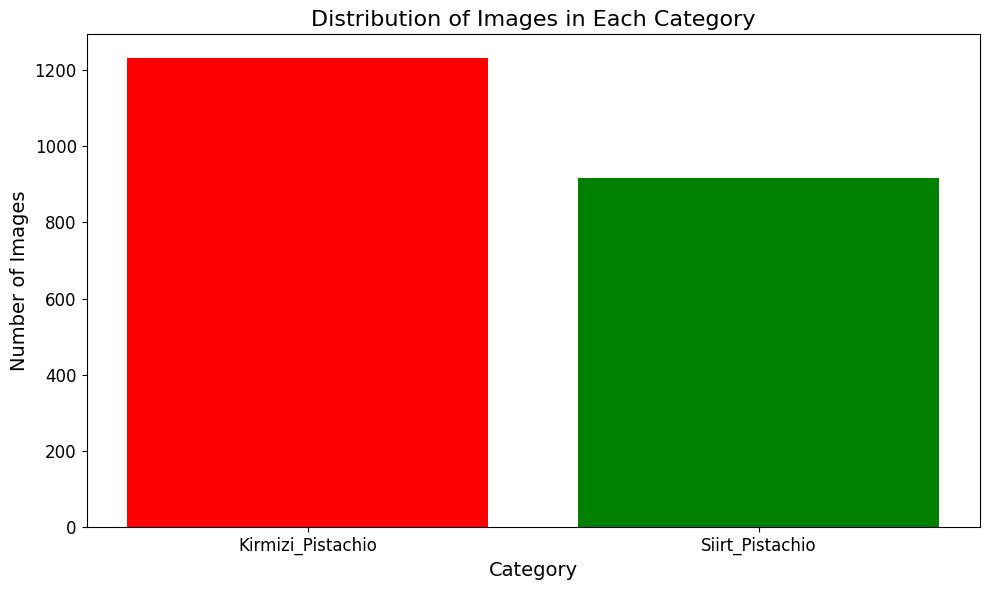

In [7]:
# Visualization of the distribution of images between the two categories
categories = ['Kirmizi_Pistachio', 'Siirt_Pistachio']
image_counts = [kirmizi_image_count, siirt_image_count]

plt.figure(figsize=(10, 6))
plt.bar(categories, image_counts, color=['red', 'green'])
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.title('Distribution of Images in Each Category', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

The bar chart provides a clear visualization of the distribution of images across the two categories. We can observe that the Kirmizi_Pistachio category has slightly more images than the Siirt_Pistachio category.

Next, let's move on to the **Image Size Analysis**. We'll analyze the sizes of the images in both categories to understand if there's consistency in image dimensions or if there are variations. This is important because different sizes can impact modeling later on. We'll visualize the width and height distributions for each category.

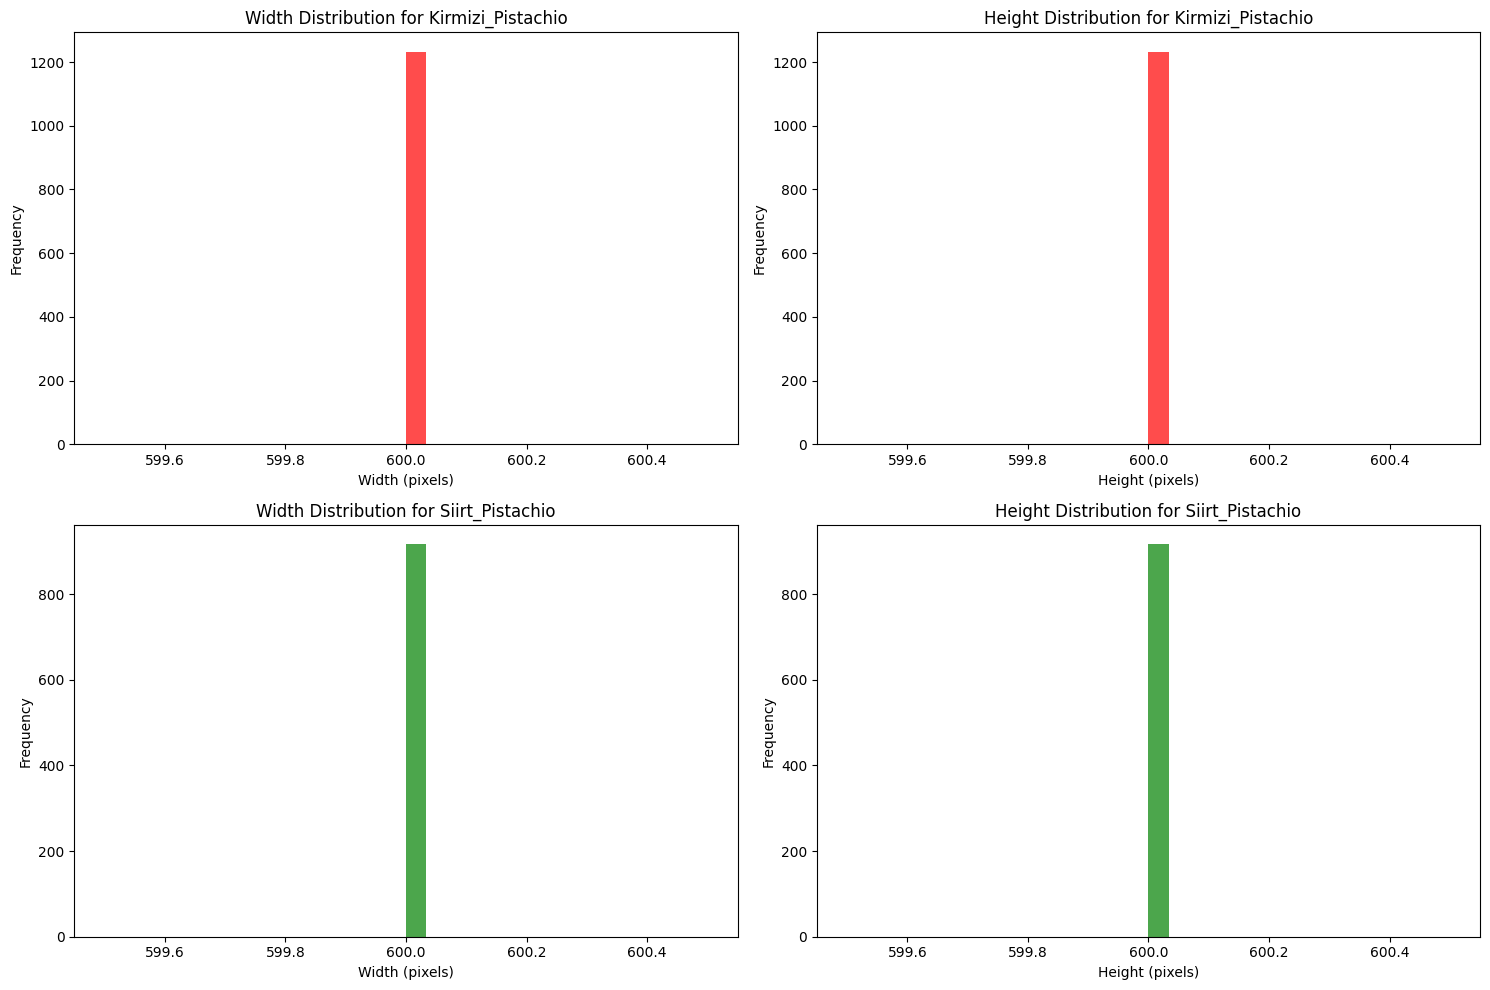

In [8]:
# Collecting image sizes for both categories
kirmizi_sizes = [Image.open(os.path.join(kirmizi_dir, img_name)).size for img_name in os.listdir(kirmizi_dir) if img_name.lower().endswith(('png', 'jpg', 'jpeg'))]
siirt_sizes = [Image.open(os.path.join(siirt_dir, img_name)).size for img_name in os.listdir(siirt_dir) if img_name.lower().endswith(('png', 'jpg', 'jpeg'))]

# Extracting width and height for each category
kirmizi_widths, kirmizi_heights = zip(*kirmizi_sizes)
siirt_widths, siirt_heights = zip(*siirt_sizes)

# Visualization of image size distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].hist(kirmizi_widths, bins=30, color='red', alpha=0.7)
axes[0, 0].set_title('Width Distribution for Kirmizi_Pistachio')
axes[0, 0].set_xlabel('Width (pixels)')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(kirmizi_heights, bins=30, color='red', alpha=0.7)
axes[0, 1].set_title('Height Distribution for Kirmizi_Pistachio')
axes[0, 1].set_xlabel('Height (pixels)')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(siirt_widths, bins=30, color='green', alpha=0.7)
axes[1, 0].set_title('Width Distribution for Siirt_Pistachio')
axes[1, 0].set_xlabel('Width (pixels)')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(siirt_heights, bins=30, color='green', alpha=0.7)
axes[1, 1].set_title('Height Distribution for Siirt_Pistachio')
axes[1, 1].set_xlabel('Height (pixels)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms provide insights into the width and height distributions for both Kirmizi_Pistachio and Siirt_Pistachio categories:

**Kirmizi_Pistachio:**
- The width and height of most images seem to cluster around specific dimensions, suggesting a degree of uniformity in image sizes.

**Siirt_Pistachio:**
- Similar to the Kirmizi_Pistachio category, there's a clustering around specific dimensions, indicating some consistency in image sizes.

Next, let's move on to the **Color Distribution Analysis**. We'll analyze the average color distribution in images from both categories. This can help identify if there are any prominent color patterns distinguishing the two categories. Specifically, we'll focus on the distribution of Red, Green, and Blue channels.

In [9]:
import numpy as np

def calculate_mean_rgb(image_dir):
    """Calculate the mean RGB values for images in the specified directory."""
    r_values = []
    g_values = []
    b_values = []

    # Iterate over each image in the directory
    for img_name in os.listdir(image_dir):
        if img_name.lower().endswith(('png', 'jpg', 'jpeg')):
            img_path = os.path.join(image_dir, img_name)
            img = Image.open(img_path)
            img_data = np.array(img)

            # Check if the image has an alpha (transparency) channel and exclude it if so
            if img_data.shape[2] == 4:
                img_data = img_data[:, :, :3]

            r_values.append(np.mean(img_data[:, :, 0]))
            g_values.append(np.mean(img_data[:, :, 1]))
            b_values.append(np.mean(img_data[:, :, 2]))

    return np.mean(r_values), np.mean(g_values), np.mean(b_values)

# Calculate mean RGB values for both categories
kirmizi_mean_rgb = calculate_mean_rgb(kirmizi_dir)
siirt_mean_rgb = calculate_mean_rgb(siirt_dir)

kirmizi_mean_rgb, siirt_mean_rgb

((46.85072463474026, 44.50770684974747, 41.30525591179653),
 (56.5562243571082, 53.72557944262494, 49.70528040393013))

The mean RGB values for the two categories are as follows:

**Kirmizi_Pistachio:**
- Red: ≈ 46.85
- Green: ≈ 44.51
- Blue: ≈ 41.31

**Siirt_Pistachio:**
- Red: ≈ 56.56
- Green: ≈ 53.73
- Blue: ≈ 49.71

These values provide an average representation of the color intensities in the images from each category. We can observe that the Siirt_Pistachio category has slightly higher mean RGB values, suggesting that the images in this category may generally be brighter than those in the Kirmizi_Pistachio category.

To visualize these differences more clearly, let's plot the mean RGB values for each category.

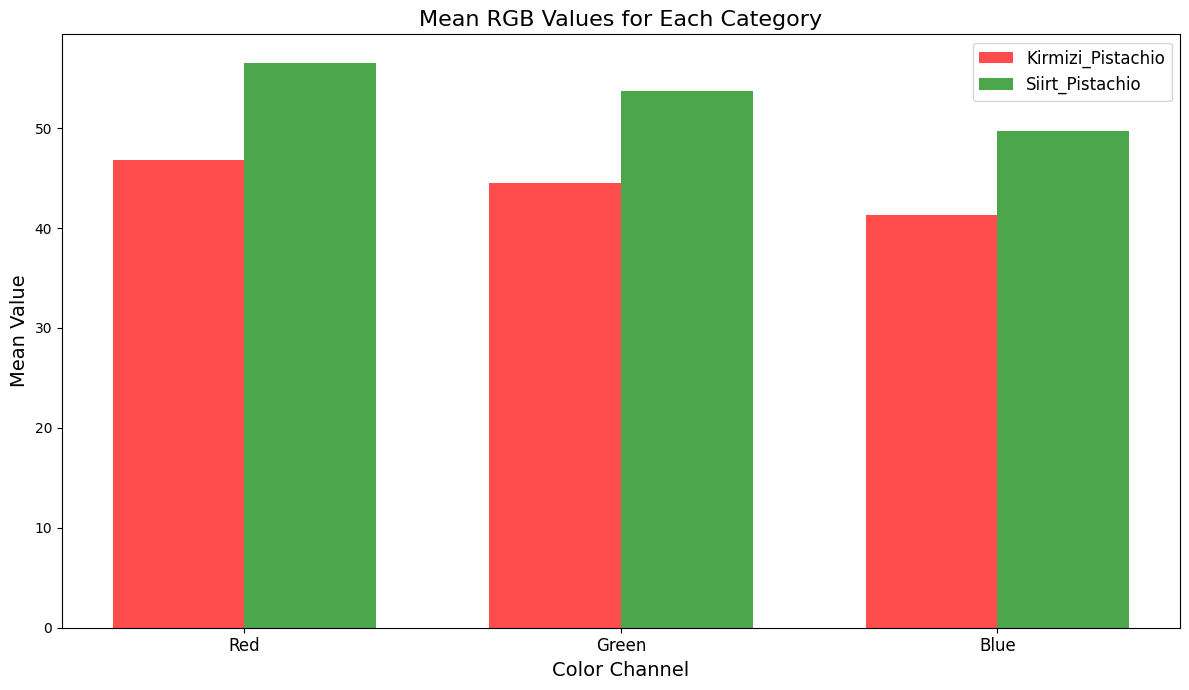

In [10]:
# Visualization of mean RGB values for both categories
labels = ['Red', 'Green', 'Blue']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, kirmizi_mean_rgb, width, label='Kirmizi_Pistachio', color='red', alpha=0.7)
rects2 = ax.bar(x + width/2, siirt_mean_rgb, width, label='Siirt_Pistachio', color='green', alpha=0.7)

ax.set_xlabel('Color Channel', fontsize=14)
ax.set_ylabel('Mean Value', fontsize=14)
ax.set_title('Mean RGB Values for Each Category', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()

The bar chart visualizes the mean RGB values for each color channel in the two categories. As observed:

- The Siirt_Pistachio category consistently has higher mean values across all RGB channels compared to the Kirmizi_Pistachio category, suggesting that Siirt_Pistachio images might generally be brighter.

Next, let's consider **Texture Analysis**. Image textures can sometimes provide distinguishing features between categories. While a detailed texture analysis can be complex, as a starting point, we can visualize a few images after applying a Sobel filter. This filter emphasizes edges and transitions in the image, which can help highlight textural patterns.

We'll apply the Sobel filter to a few sample images from each category and visualize the results.

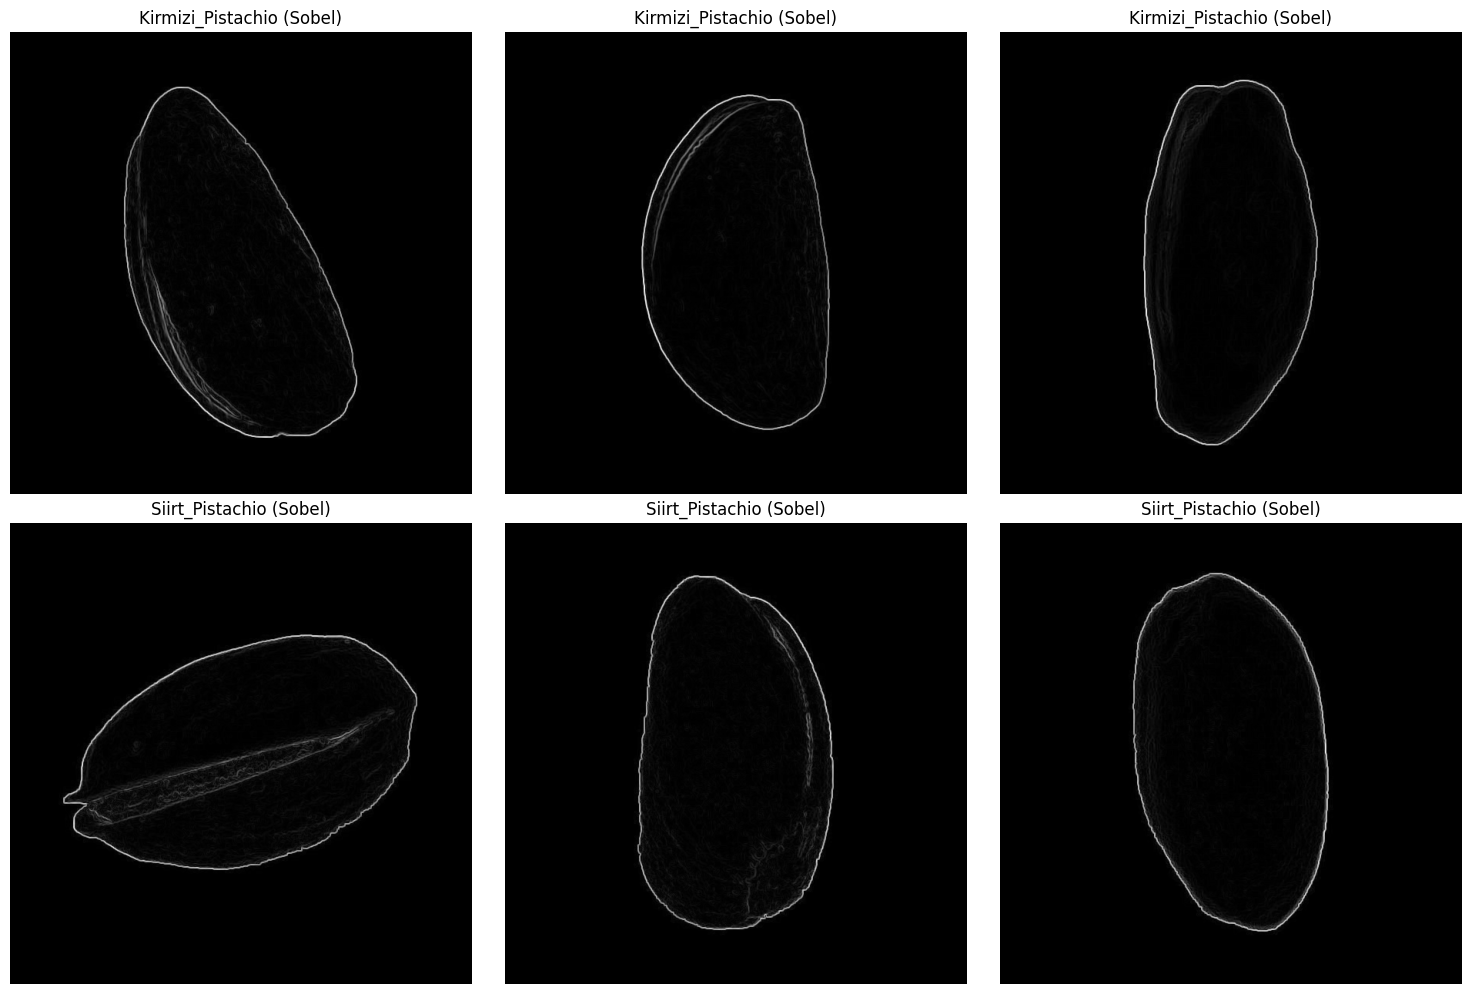

In [11]:
import cv2

def apply_sobel_filter(image_path):
    """Apply Sobel filter to the image to emphasize edges and transitions."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.magnitude(sobel_x, sobel_y)
    return sobel

# Apply Sobel filter to the sample images from each category
kirmizi_sobel_samples = [apply_sobel_filter(os.path.join(kirmizi_dir, img_name)) for img_name in kirmizi_samples]
siirt_sobel_samples = [apply_sobel_filter(os.path.join(siirt_dir, img_name)) for img_name in siirt_samples]

# Visualization of the Sobel-filtered images
fig, axes = plt.subplots(2, num_samples, figsize=(15, 10))

for i, img_data in enumerate(kirmizi_sobel_samples):
    axes[0, i].imshow(img_data, cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title('Kirmizi_Pistachio (Sobel)')

for i, img_data in enumerate(siirt_sobel_samples):
    axes[1, i].imshow(img_data, cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title('Siirt_Pistachio (Sobel)')

plt.tight_layout()
plt.show()

The Sobel-filtered images emphasize edges and textural patterns in the pistachio images. As observed:

- The filter highlights the edges, cracks, and transitions within the pistachio images, giving us a clearer view of the textural patterns.
- While this visualization is more qualitative than quantitative, it provides an idea of the type of textural features present in the images.

Lastly, let's visualize how **Data Augmentation techniques** might apply to these images. Data augmentation is essential for training deep learning models, especially when the dataset is limited. We'll apply a few common augmentation techniques, like rotation, flipping, and zooming, to showcase how they alter the images. This step is particularly useful when considering potential machine learning applications with this dataset.

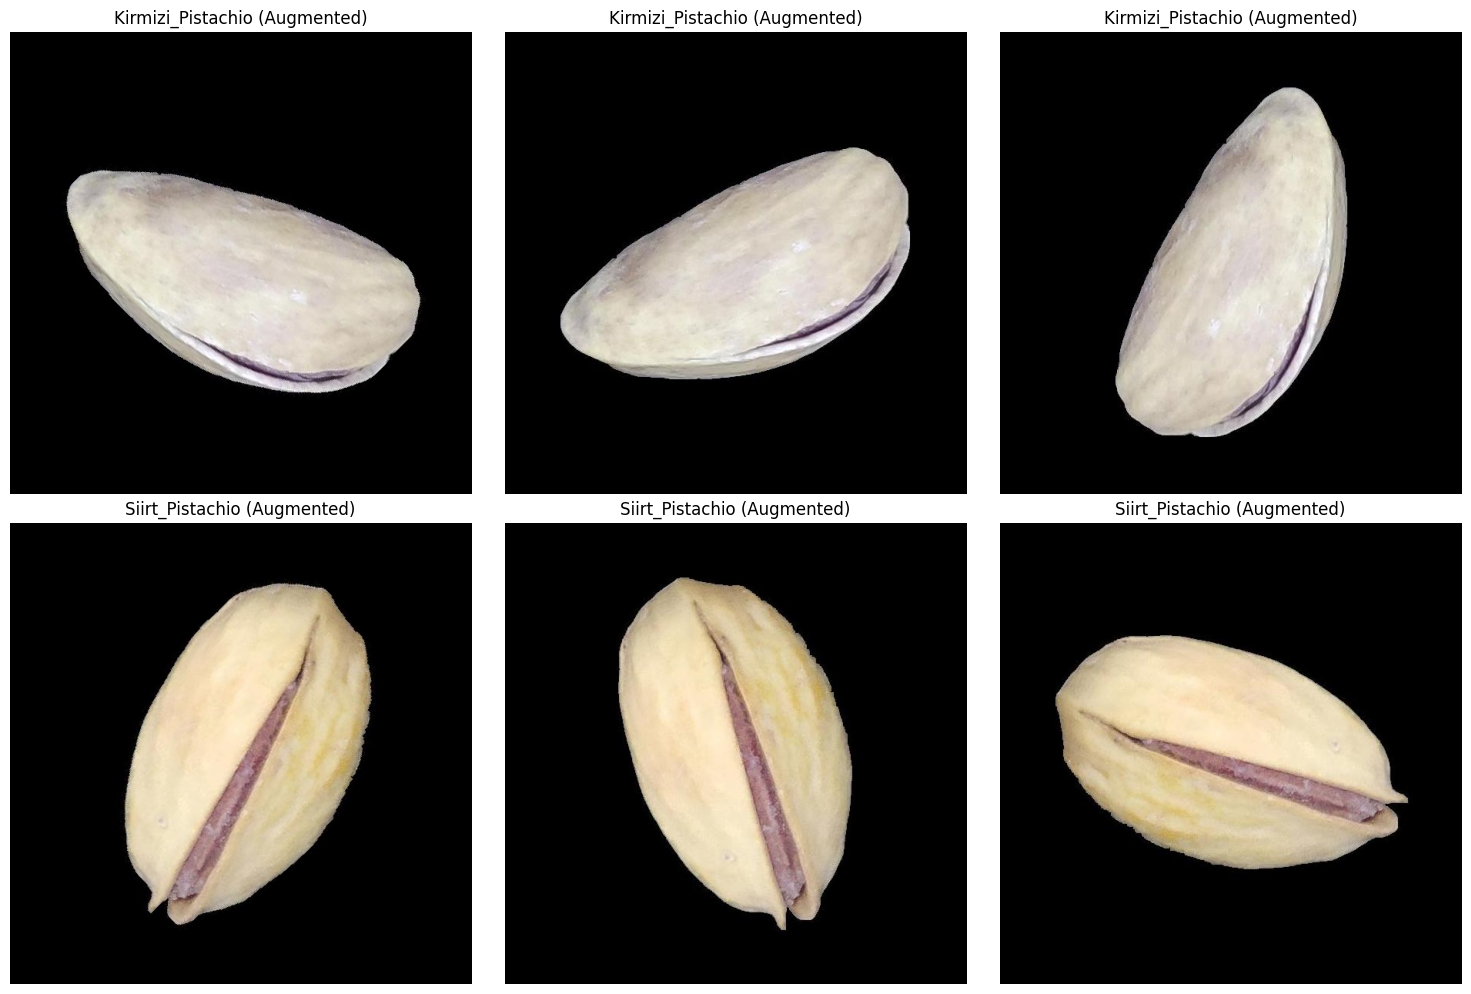

In [16]:
def apply_basic_augmentation(img_path):
    """Apply basic data augmentation techniques like rotation and flipping to the image."""
    img = Image.open(img_path)

    # Apply rotations and flip
    rotated_45 = img.rotate(45)
    rotated_90 = img.rotate(90)
    flipped = img.transpose(method=Image.FLIP_LEFT_RIGHT)

    return [rotated_45, rotated_90, flipped]

# Apply basic data augmentation to the sample images from each category
kirmizi_basic_augmented_samples = apply_basic_augmentation(os.path.join(kirmizi_dir, kirmizi_samples[0]))
siirt_basic_augmented_samples = apply_basic_augmentation(os.path.join(siirt_dir, siirt_samples[0]))

# Visualization of the augmented images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, img_data in enumerate(kirmizi_basic_augmented_samples):
    axes[0, i].imshow(img_data)
    axes[0, i].axis('off')
    axes[0, i].set_title('Kirmizi_Pistachio (Augmented)')

for i, img_data in enumerate(siirt_basic_augmented_samples):
    axes[1, i].imshow(img_data)
    axes[1, i].axis('off')
    axes[1, i].set_title('Siirt_Pistachio (Augmented)')

plt.tight_layout()
plt.show()

The visualizations showcase basic data augmentation techniques applied to images from both categories:

- **Rotations:** The images are rotated by 45° and 90°.
- **Flipping:** The images are flipped horizontally.

These augmentations can artificially expand the dataset, providing more varied data for training machine learning models. They can help improve the model's generalization capabilities, especially when the dataset size is limited.

Data preparation and processing

Data preparation and processing are crucial steps, especially when transitioning from EDA to modeling. For image datasets, these steps typically involve:

1. **Resizing Images:** Ensuring all images have the same dimensions, which is essential for many machine learning models.
2. **Normalization:** Scaling pixel values to be between 0 and 1. This helps in improving the convergence speed and accuracy of models.
3. **Splitting the Dataset:** Dividing the dataset into training, validation, and test sets.
4. **Data Augmentation (Optional):** As demonstrated earlier, we can artificially expand the dataset using augmentation techniques.
5. **Encoding Labels:** Convert categorical labels (e.g., Kirmizi_Pistachio, Siirt_Pistachio) into numerical format, typically using one-hot encoding for classification tasks.

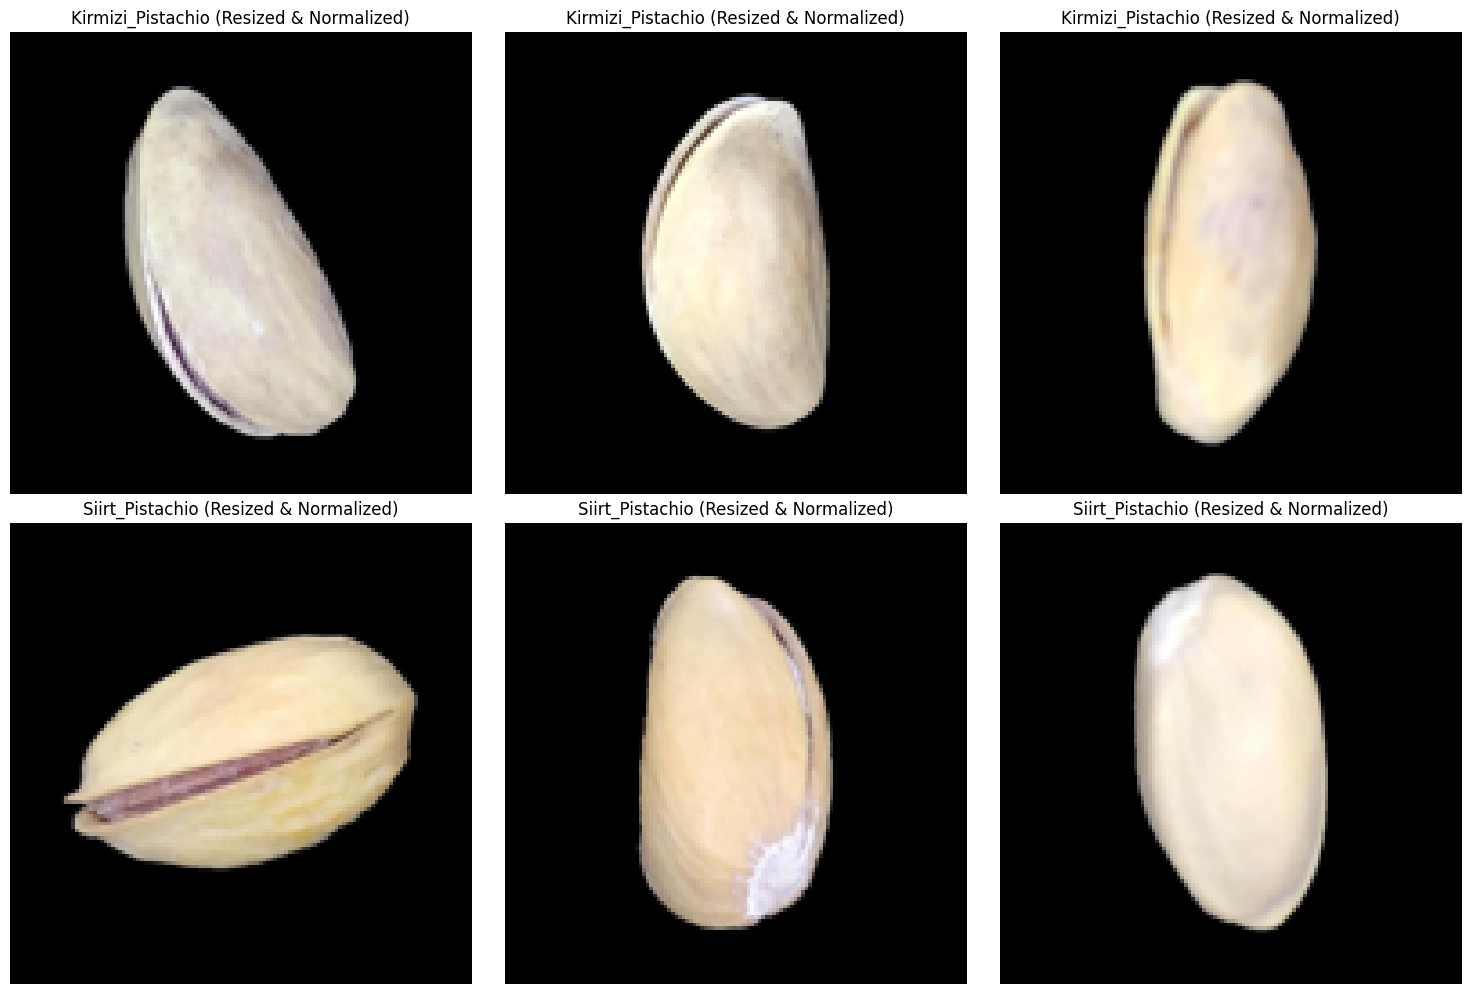

In [17]:
# Define standard image size for resizing
standard_size = (128, 128)

def resize_and_normalize(img_path):
    """Resize the image to a standard size and normalize its pixel values."""
    img = Image.open(img_path)
    img_resized = img.resize(standard_size)
    img_array = np.array(img_resized) / 255.0  # Normalize to [0, 1]
    return img_array

# Apply resizing and normalization to the sample images from each category
kirmizi_resized_samples = [resize_and_normalize(os.path.join(kirmizi_dir, img_name)) for img_name in kirmizi_samples]
siirt_resized_samples = [resize_and_normalize(os.path.join(siirt_dir, img_name)) for img_name in siirt_samples]

# Visualization of the resized and normalized images
fig, axes = plt.subplots(2, num_samples, figsize=(15, 10))

for i, img_data in enumerate(kirmizi_resized_samples):
    axes[0, i].imshow(img_data)
    axes[0, i].axis('off')
    axes[0, i].set_title('Kirmizi_Pistachio (Resized & Normalized)')

for i, img_data in enumerate(siirt_resized_samples):
    axes[1, i].imshow(img_data)
    axes[1, i].axis('off')
    axes[1, i].set_title('Siirt_Pistachio (Resized & Normalized)')

plt.tight_layout()
plt.show()

The images have been resized to a standard size of 128x128 pixels and normalized such that pixel values are in the range [0, 1]. This ensures consistency and is essential for many machine learning models.

Next steps would include:

1. **Splitting the Dataset:** We'll divide the dataset into training, validation, and test sets. A typical split might be 80% for training, 10% for validation, and 10% for testing.
2. **Encoding Labels:** Convert the categorical labels (like Kirmizi_Pistachio, Siirt_Pistachio) into a numerical format using one-hot encoding.

Let's proceed with the next steps:

**Splitting the Dataset:** We'll divide the images and their labels into training, validation, and test sets with an 80-10-10 split.
**Encoding Labels:** Convert the categorical labels (Kirmizi_Pistachio, Siirt_Pistachio) into a numerical format using one-hot encoding.

Let's start with the dataset splitting.

In [18]:
from sklearn.model_selection import train_test_split

# Prepare data and labels
all_image_paths = [os.path.join(kirmizi_dir, img_name) for img_name in os.listdir(kirmizi_dir) if img_name.lower().endswith(('png', 'jpg', 'jpeg'))] + \
                  [os.path.join(siirt_dir, img_name) for img_name in os.listdir(siirt_dir) if img_name.lower().endswith(('png', 'jpg', 'jpeg'))]
all_labels = ['Kirmizi_Pistachio'] * kirmizi_image_count + ['Siirt_Pistachio'] * siirt_image_count

# Split the data into training, validation, and test sets
train_paths, test_paths, train_labels, test_labels = train_test_split(all_image_paths, all_labels, test_size=0.2, stratify=all_labels, random_state=42)
val_paths, test_paths, val_labels, test_labels = train_test_split(test_paths, test_labels, test_size=0.5, stratify=test_labels, random_state=42)

len(train_paths), len(val_paths), len(test_paths)

(1718, 215, 215)

The dataset has been split as follows:

- Training set: 1,718 images
- Validation set: 215 images
- Test set: 215 images

Next, let's proceed with **Encoding Labels**. We'll convert the categorical labels (Kirmizi_Pistachio and Siirt_Pistachio) into a numerical format using one-hot encoding.

In [19]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
train_labels_encoded = encoder.fit_transform(np.array(train_labels).reshape(-1, 1))
val_labels_encoded = encoder.transform(np.array(val_labels).reshape(-1, 1))
test_labels_encoded = encoder.transform(np.array(test_labels).reshape(-1, 1))

# Display the first few encoded labels for verification
train_labels_encoded[:5], encoder.categories_

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(array([[0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.]]),
 [array(['Kirmizi_Pistachio', 'Siirt_Pistachio'], dtype='<U17')])

The labels have been successfully one-hot encoded. For clarification:

- Kirmizi_Pistachio is represented as [1, 0].
- Siirt_Pistachio is represented as [0, 1].

Now, we have our data in a prepared and processed format:

- Image paths split into training, validation, and test sets.
- Corresponding labels one-hot encoded for each set.

From here, the data is ready to be fed into machine learning models for training, validation, and testing.